You can download the dataset from Kaggle by clicking [here](https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk import tokenize
%matplotlib inline

In [2]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wors\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
df.drop(['id'], axis=1, inplace=True)

In [5]:
df['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [6]:
df['classification'] = df['sentiment'].replace(['neg', 'pos'], [0, 1])

In [7]:
df.head()

,text_en,text_pt,sentiment,classification
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [8]:
df['text_pt'].nunique()

49045

In [9]:


vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(df['text_pt'])
bag_of_words.shape

(49459, 50)

In [10]:
sparse_matriz = pd.DataFrame.sparse.from_spmatrix(data=bag_of_words, columns=vectorizer.get_feature_names_out())
sparse_matriz

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,...,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,...,0,0,0,0,3,0,0,4,1,2


In [11]:
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df['classification'], random_state=42)

In [12]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(accuracy)

0.6583097452486858


In [13]:
def text_classification(data, text_column, classification_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(data[text_column])
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, data[classification_column], random_state=42)
    logistic_regression = LogisticRegression()
    logistic_regression.fit(x_train, y_train)
    return logistic_regression.score(x_test, y_test)

In [14]:
text_classification(df, 'text_pt', 'classification')

0.6583097452486858

In [15]:
all_words = ''.join([word for word in df['text_pt']])

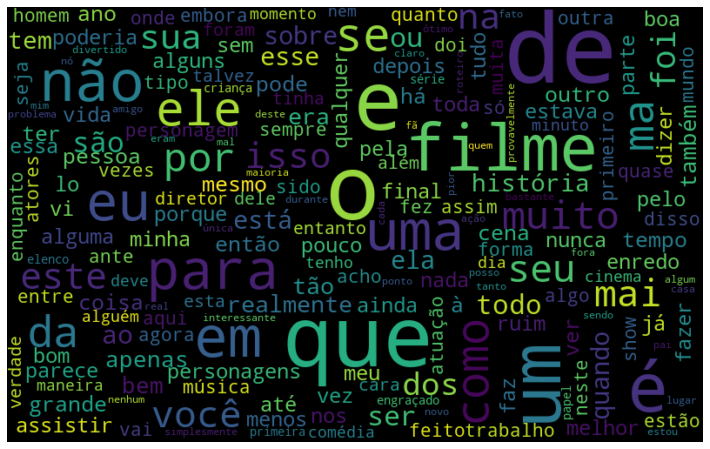

In [16]:
word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words) # As medidas width e height sao parâmetros que permitem ajustar o espaçamento entre as palavras exibidas na nuvem de palavras. Estes parâmetros podem ser usados para melhorar a visualização do gráfico.
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df.query('sentiment == "pos"')

,text_en,text_pt,sentiment,classification
12389,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...
49454,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [18]:
def generate_positive_cloud(data, text_column):
    all_positive_words = data.query('sentiment=="pos"')
    all_words = ''.join([word for word in all_positive_words[text_column]])
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words) # As medidas width e height sao parâmetros que permitem ajustar o espaçamento entre as palavras exibidas na nuvem de palavras. Estes parâmetros podem ser usados para melhorar a visualização do gráfico.
    plt.figure(figsize=(15,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
def generate_negative_cloud(data, text_column):
    all_negative_words = data.query('sentiment=="neg"')
    all_words = ''.join([word for word in all_negative_words[text_column]])
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words) # As medidas width e height sao parâmetros que permitem ajustar o espaçamento entre as palavras exibidas na nuvem de palavras. Estes parâmetros podem ser usados para melhorar a visualização do gráfico.
    plt.figure(figsize=(15,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

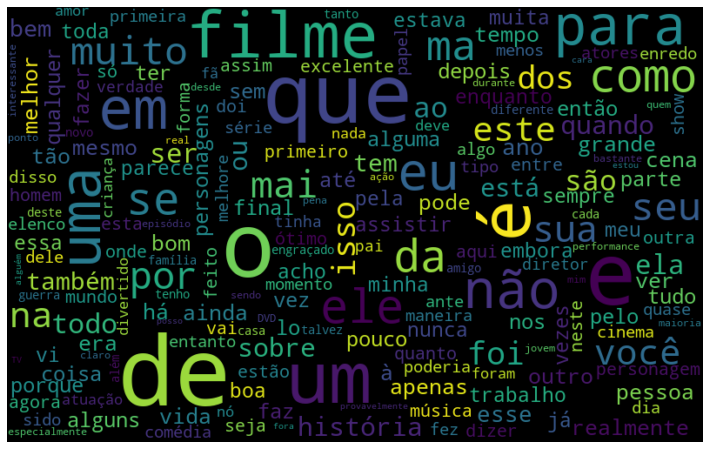

In [19]:
generate_positive_cloud(df, 'text_pt')

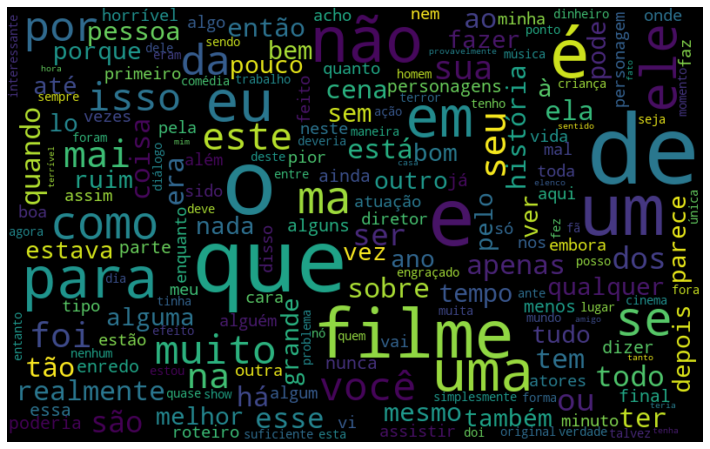

In [20]:
generate_negative_cloud(df, 'text_pt')

In [21]:
space_token = tokenize.WhitespaceTokenizer()
sentence_token = space_token.tokenize(all_words)
frequence_words = nltk.FreqDist(sentence_token)

In [22]:
df_frequence_words = pd.DataFrame({'words': frequence_words.keys(),'frequence':frequence_words.values()})

In [23]:
df_frequence_words_nlargest = df_frequence_words.nlargest(columns='frequence', n=20)

In [24]:
def bar_words(data, text_column, quantidade, color):
    all_words = ''.join([word for word in data[text_column]])
    space_token = tokenize.WhitespaceTokenizer()
    sentence_token = space_token.tokenize(all_words)
    frequence_words = nltk.FreqDist(sentence_token)
    df_frequence_words = pd.DataFrame({'words': frequence_words.keys(),'frequence':frequence_words.values()})
    df_frequence_words_nlargest = df_frequence_words.nlargest(columns='frequence', n=quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequence_words_nlargest, x='words', y='frequence', color=color)
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequence_words_nlargest, x='words', y='frequence', color='red', sort=False, ax=ax2)
    ax.set(ylabel='Count')
    return plt.show()

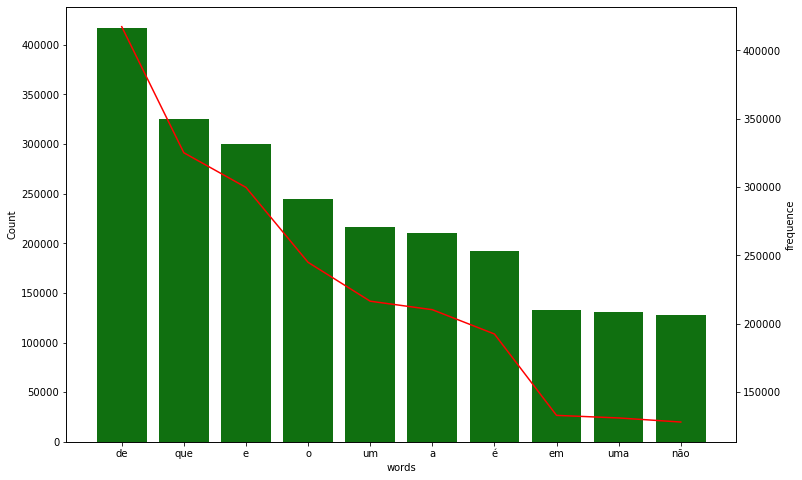

In [25]:
bar_words(df, 'text_pt', 10, 'green')